In [2]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, atan2, degrees, pi
from scipy.stats import percentileofscore
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# This line ensures that the plots are displayed within the notebook
%matplotlib inline

pd.set_option('display.max_rows', None)

In [6]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.PitcherId,
    pl.NamePlayer,
    pe.PitHand,
    p.x0,
    p.y0,
    p.z0,
    p.vx0,
    p.vy0,
    p.vz0,
    p.ax,
    p.ay,
    p.az,
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px,
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1
    AND PitchType = 'SL'   
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_fastballs=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_10924\971370574.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_fastballs=pd.read_sql(query,cnxn)


In [7]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query_compl = """
SELECT [Name]
      ,[PlayerID]
      ,[Throws]
      ,[Level]
      ,[LeagueLevel]
      ,[Season]
      ,[SplitType]
      ,[PitchType]
      ,[TP]
      ,[Usage]
      ,[VeloAvg]
      ,[VeloMin]
      ,[VeloMax]
      ,[wAVG]
      ,[StrikeRate]
      ,[CalledStrikeRate]
      ,[InZone]
      ,[SwingRate]
      ,[Whiff]
      ,[InZoneWhiff]
      ,[OutZoneSwing]
      ,[HorzBreak]
      ,[VertIndBreak]
      ,[VAA]
      ,[Extension]
      ,[SpinRate]
      ,[SpinAxis]
      ,[SpinEff]
      ,[Tilt]
      ,[ReleaseX]
      ,[ReleaseZ]
      ,[ZValExp]
      ,[ZValObs]
      ,[StuffGrade]
      ,[StuffGradeSwing]
      ,[StuffPlus]
      ,[CommandPlus]
      ,[GBPer]
      ,[PUPer]
      ,[HitSpeedCt]
      ,[HitSpeed]
      ,[HitAngleV]
      ,[FirstGame]
      ,[LastGame]
      ,[UpdatedDate]
  FROM [mlb_stats].[dbo].[stat_pitcher_pitch]
  WHERE Season = 2024 AND PitchType = 'SL'  AND SplitType = 'All' AND TP >= 75 AND CommandPlus IS NOT NULL AND LeagueLevel = 1
"""

OAK_Command=pd.read_sql(query_compl,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_10924\1676228313.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_Command=pd.read_sql(query_compl,cnxn)


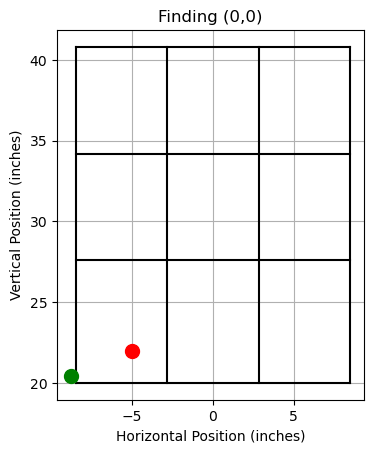

In [9]:
import matplotlib.pyplot as plt

Player_df = OAK_Command[OAK_Command['Name'] == 'Boyle, Joe']
# Step 2: Extract the VertIndBreak and HorzBreak values
vert_ind_break = Player_df['VertIndBreak'].values[0]
horz_break = Player_df['HorzBreak'].values[0]

# Original coordinates of the red dot in the top-right zone
center_x = -5 # Example value for center x
center_y = 22  # Example value for center y (top-right zone center)

# Step 3: Adjust the coordinates by subtracting the break values
adjusted_x = center_x + horz_break
adjusted_y = center_y + vert_ind_break

# Step 4: Plot the strike zone and the adjusted red dot
fig, ax2 = plt.subplots()

# Draw the outer boundaries of the strike zone
ax2.plot([-8.4996, 8.4996], [20.0, 20.0], color='black')  # Bottom line
ax2.plot([-8.4996, 8.4996], [40.8, 40.8], color='black')  # Top line
ax2.plot([-8.4996, -8.4996], [20.0, 40.8], color='black')  # Left line
ax2.plot([8.4996, 8.4996], [20.0, 40.8], color='black')  # Right line

# Draw the vertical lines to split into 3 columns
for i in range(1, 3):
    x = -8.4996 + i * 5.6664
    ax2.plot([x, x], [20.0, 40.8], color='black')

# Draw the horizontal lines to split into 3 rows
for j in range(1, 3):
    y = 21.0 + j * 6.6
    ax2.plot([-8.4996, 8.4996], [y, y], color='black')

# Plot the adjusted red dot
ax2.plot(center_x, center_y, 'ro', markersize=10, label='Original Target')  # Red circle

# Plot the adjusted green dot
ax2.plot(adjusted_x, adjusted_y, 'go', markersize=10, label='Adjusted Pitch')  # Green circle


# Set axis labels and title
ax2.set_xlabel('Horizontal Position (inches)')
ax2.set_ylabel('Vertical Position (inches)')
ax2.set_title('Finding (0,0)')

# Set the aspect of the plot to be equal
ax2.set_aspect('equal')

plt.grid(True)
plt.show()
